In [1]:
import numpy
from scipy import linalg, special
from scipy.integrate import solve_ivp
import matplotlib
from matplotlib import pyplot

from tqdm.notebook import tqdm

import joblib

from born_markov import *

In [ ]:
e_0 = 0.1 # eV
Gamma = 0.01 # eV
T = 100 # K
voltages = numpy.linspace(-.5, .5, 501)

currents = numpy.zeros((len(voltages), 2))

for i, voltage in enumerate(tqdm(voltages)):
    solver = create_single_level_solver(e_0, Gamma, -0.5*voltage, 0.5*voltage, T, T)
    rho_ss, L = solver.find_steady_state()
    currents[i] = solver.get_current(rho_ss)
    
pyplot.figure(figsize=(15,10))
pyplot.plot(voltages, currents[:,0], label="$J_L$")
pyplot.plot(voltages, currents[:,1], label="$J_R$")
pyplot.grid()
pyplot.legend(loc=1)
pyplot.xlabel("$\\Delta\\phi$ [V]")
pyplot.ylabel("$J_K$ [mA]")
#pyplot.savefig("single_level_currents.pdf")
pyplot.show()

numpy.save("SL_100K", currents)

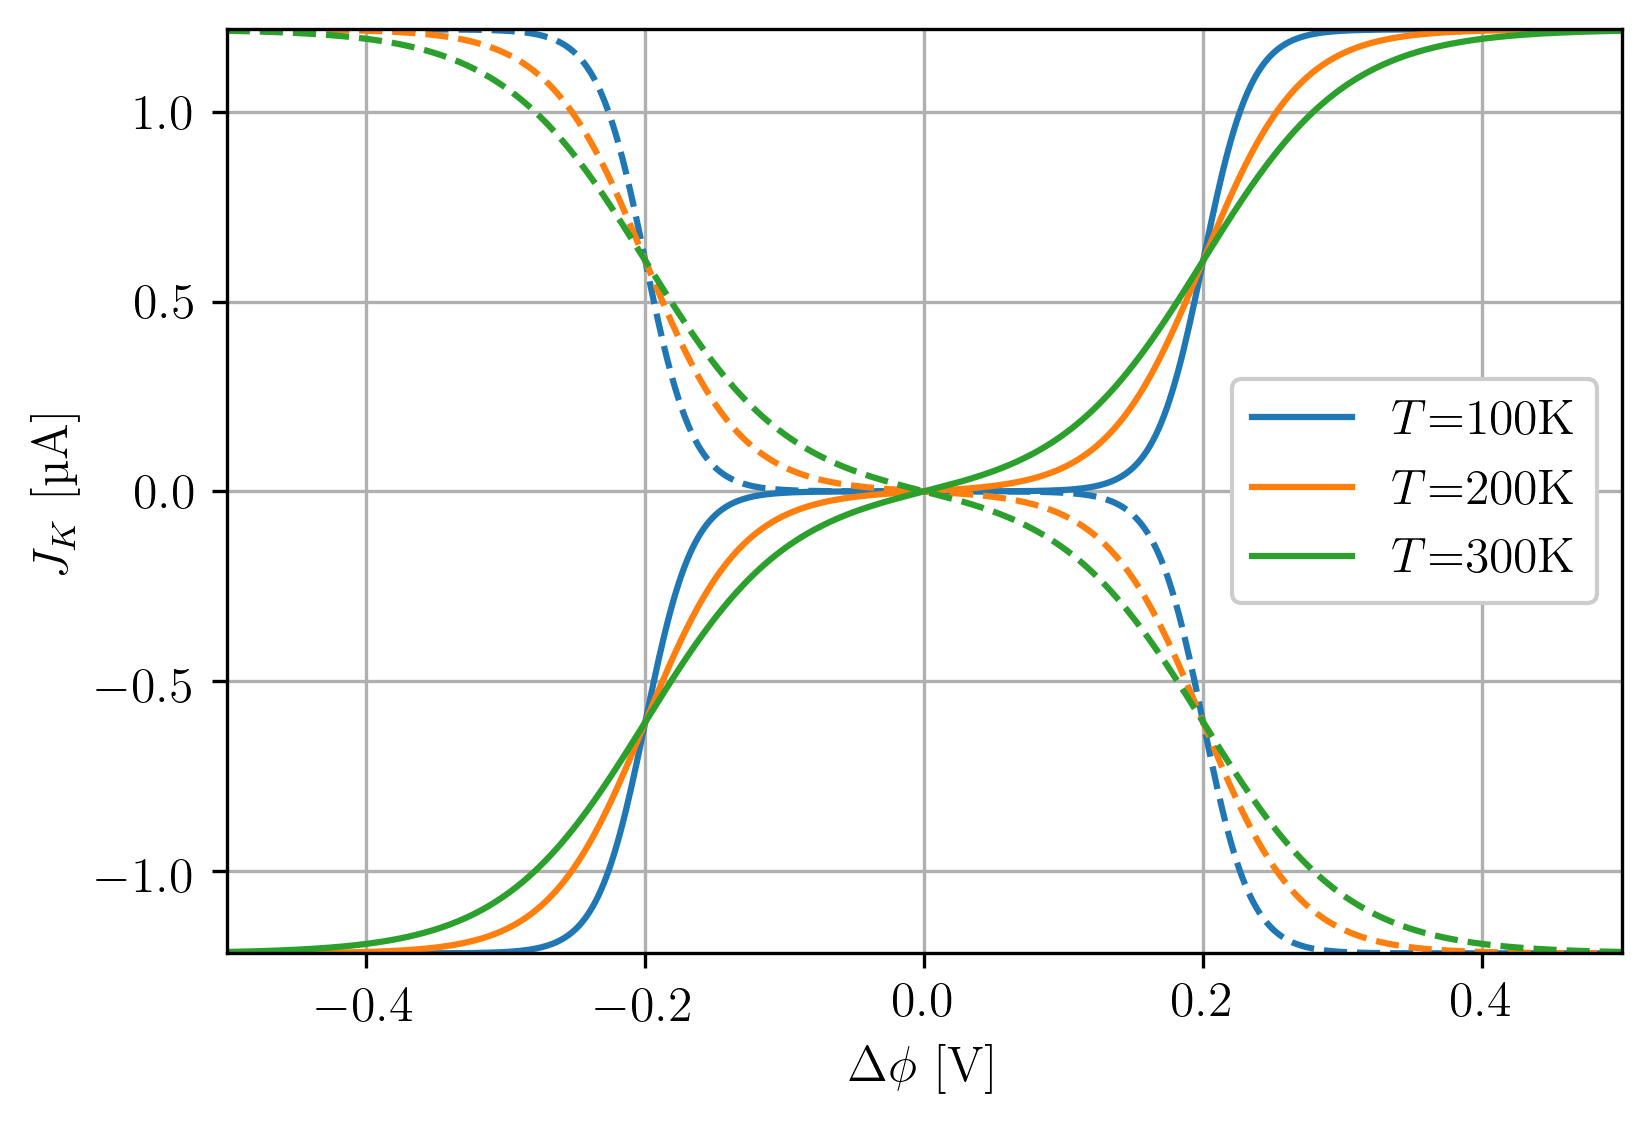

In [3]:
pyplot.figure(figsize=(6,4))
voltages = numpy.linspace(-.5, .5, 501)
pyplot.plot(voltages, 1e3*numpy.load("SL_100K.npy")[:,0], label="$T$=100K", c="tab:blue")
pyplot.plot(voltages, 1e3*numpy.load("SL_100K.npy")[:,1], c="tab:blue", ls="--")
pyplot.plot(voltages, 1e3*numpy.load("SL_200K.npy")[:,0], label="$T$=200K", c="tab:orange")
pyplot.plot(voltages, 1e3*numpy.load("SL_200K.npy")[:,1], c="tab:orange", ls="--")
pyplot.plot(voltages, 1e3*numpy.load("SL_300K.npy")[:,0], label="$T$=300K", c="tab:green")
pyplot.plot(voltages, 1e3*numpy.load("SL_300K.npy")[:,1], c="tab:green", ls="--")
pyplot.grid()
pyplot.legend(loc=5, framealpha=1.)
pyplot.xlabel("$\\Delta\\phi$ [V]")
pyplot.ylabel("$J_K$ [µA]")
pyplot.xlim(-.5, .5)
pyplot.ylim(1e3*numpy.amin(numpy.load("SL_100K.npy")[:,0]), 1e3*numpy.amax(numpy.load("SL_100K.npy")[:,0]))
pyplot.savefig("SL_currents.pdf")
pyplot.gcf().set_dpi(300)
pyplot.show()